# Imports


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk  
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df1 = pd.read_csv('/content/Hotel_Reviews_Trip_Advisor.csv')

In [28]:
df2 = pd.read_csv('/content/tripadvisor_hotel_reviews.csv', on_bad_lines='skip')

In [29]:
sns.set_context('poster')

#  Preprocessing

In [30]:
df1.head()

,Unnamed: 0,hotel_name,review_summary,score,review
0,0.0,Hotel Hilton London Gatwick Airport,Awful...,1.0,Its hard to find words that can describe this ...
1,1.0,Hilton London Metropole,Terrible,1.0,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,2.0,Hilton London Euston,Double deposit taken from bank,1.0,Very disappointed firstly i checked in online ...
3,3.0,Hilton London Metropole,Super disappointed!,1.0,First of all we arrived wanting to park at the...
4,4.0,Hilton London Metropole,Dissatisfied Hilton gold number,1.0,"Hello, I currently staying @ Hilton Metropole..."


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9405 non-null   float64
 1   hotel_name      9406 non-null   object 
 2   review_summary  9406 non-null   object 
 3   score           9404 non-null   float64
 4   review          9404 non-null   object 
dtypes: float64(2), object(3)
memory usage: 367.5+ KB


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  26157 non-null  object
 1   Rating  26157 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 408.8+ KB


In [33]:
df2.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [34]:
df2_new = df2.rename(columns={'Review': 'review', 'Rating': 'rating'} )
df1_new = df1.rename(columns={'score': 'rating'})

In [35]:
df1_new = df1_new.drop(['hotel_name', 'review_summary'], axis=1 )
df1_new

,Unnamed: 0,rating,review
0,0.0,1.0,Its hard to find words that can describe this ...
1,1.0,1.0,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,2.0,1.0,Very disappointed firstly i checked in online ...
3,3.0,1.0,First of all we arrived wanting to park at the...
4,4.0,1.0,"Hello, I currently staying @ Hilton Metropole..."
...,...,...,...
9401,9400.0,5.0,Came to London with a pre booked trip and when...
9402,9401.0,5.0,It's been over a year since we stayed at the H...
9403,9402.0,5.0,My second stay here and what a transformation....
9404,9403.0,5.0,I arranged an annual business meeting at the H...


In [36]:
df1_new = df1_new.set_index('Unnamed: 0')
df1_new

,rating,review
Unnamed: 0,,
0.0,1.0,Its hard to find words that can describe this ...
1.0,1.0,"Absolutely terrible. Cracked ceiling, tiny roo..."
2.0,1.0,Very disappointed firstly i checked in online ...
3.0,1.0,First of all we arrived wanting to park at the...
4.0,1.0,"Hello, I currently staying @ Hilton Metropole..."
...,...,...
9400.0,5.0,Came to London with a pre booked trip and when...
9401.0,5.0,It's been over a year since we stayed at the H...
9402.0,5.0,My second stay here and what a transformation....


In [37]:
df2_new['rating'] = df2_new['rating'].astype(float)
df2_new

,review,rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
26152,"best kept secret 3rd time staying charm, not 5...",5.0
26153,great location price view hotel great quick pl...,4.0
26154,"ok just looks nice modern outside, desk staff ...",2.0
26155,hotel theft ruined vacation hotel opened sept ...,1.0


In [38]:
frames = [df1_new, df2_new]
df = pd.concat(frames)
display(df)

,rating,review
0.0,1.0,Its hard to find words that can describe this ...
1.0,1.0,"Absolutely terrible. Cracked ceiling, tiny roo..."
2.0,1.0,Very disappointed firstly i checked in online ...
3.0,1.0,First of all we arrived wanting to park at the...
4.0,1.0,"Hello, I currently staying @ Hilton Metropole..."
...,...,...
26152.0,5.0,"best kept secret 3rd time staying charm, not 5..."
26153.0,4.0,great location price view hotel great quick pl...
26154.0,2.0,"ok just looks nice modern outside, desk staff ..."
26155.0,1.0,hotel theft ruined vacation hotel opened sept ...


In [39]:
df.to_csv('/content/neural_network_data.csv',index=False)

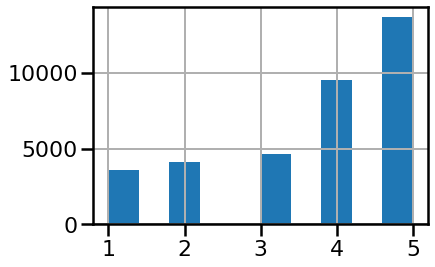

In [40]:
df['rating'].hist()

# 1.1 Checking Frequency of Words and Phrases in Review Summaries

In [41]:
df['review'] = df['review'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 35563 entries, 0.0 to 26156.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  35561 non-null  float64
 1   review  35563 non-null  object 
dtypes: float64(1), object(1)
memory usage: 833.5+ KB


In [42]:
flat_review_summary = " ".join(df['review'].values)

In [43]:
flat_review_summary

Output hidden; open in https://colab.research.google.com to view.

In [44]:
flat_list_review_summaries = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(flat_review_summary)

In [45]:
tokenized_reviews

['Its',
 'hard',
 'to',
 'find',
 'words',
 'that',
 'can',
 'describe',
 'this',
 'experience',
 'without',
 'being',
 'too',
 'dismissive',
 'so',
 'i',
 'll',
 'keep',
 'it',
 'short',
 'Pros',
 'Check',
 'experience',
 'was',
 'fine',
 'The',
 'checkin',
 'clerk',
 'was',
 'funny',
 'and',
 'helpful',
 'and',
 'had',
 'a',
 'lovely',
 'manner',
 'with',
 'the',
 'guests',
 'Very',
 'efficient',
 'Location',
 'Very',
 'well',
 'set',
 'for',
 'access',
 'to',
 'Gatwick',
 'airport',
 'with',
 'a',
 'short',
 'walk',
 'to',
 'the',
 'terminal',
 'for',
 'your',
 'flights',
 'Cons',
 'Food',
 'the',
 'hotel',
 'not',
 'only',
 'was',
 'packed',
 'full',
 'and',
 'the',
 'restaurants',
 'were',
 'full',
 'but',
 'the',
 'food',
 'itself',
 'was',
 'incredibly',
 'poor',
 'and',
 'expensive',
 'We',
 'did',
 'the',
 'buffet',
 'on',
 'the',
 'evening',
 'barely',
 'anything',
 'was',
 'truly',
 'good',
 'tasting',
 'AVOID',
 'Comfort',
 'Hiltons',
 'of',
 'late',
 'seem',
 'to',
 'be',


In [46]:
for review in tokenized_reviews:
    flat_list_review_summaries.append(review.lower())

In [47]:
flat_list_review_summaries

['its',
 'hard',
 'to',
 'find',
 'words',
 'that',
 'can',
 'describe',
 'this',
 'experience',
 'without',
 'being',
 'too',
 'dismissive',
 'so',
 'i',
 'll',
 'keep',
 'it',
 'short',
 'pros',
 'check',
 'experience',
 'was',
 'fine',
 'the',
 'checkin',
 'clerk',
 'was',
 'funny',
 'and',
 'helpful',
 'and',
 'had',
 'a',
 'lovely',
 'manner',
 'with',
 'the',
 'guests',
 'very',
 'efficient',
 'location',
 'very',
 'well',
 'set',
 'for',
 'access',
 'to',
 'gatwick',
 'airport',
 'with',
 'a',
 'short',
 'walk',
 'to',
 'the',
 'terminal',
 'for',
 'your',
 'flights',
 'cons',
 'food',
 'the',
 'hotel',
 'not',
 'only',
 'was',
 'packed',
 'full',
 'and',
 'the',
 'restaurants',
 'were',
 'full',
 'but',
 'the',
 'food',
 'itself',
 'was',
 'incredibly',
 'poor',
 'and',
 'expensive',
 'we',
 'did',
 'the',
 'buffet',
 'on',
 'the',
 'evening',
 'barely',
 'anything',
 'was',
 'truly',
 'good',
 'tasting',
 'avoid',
 'comfort',
 'hiltons',
 'of',
 'late',
 'seem',
 'to',
 'be',


In [48]:
stop_words = stopwords.words("english")

flat_list_review_summaries_no_stop = [word for word in flat_list_review_summaries if word not in stop_words]

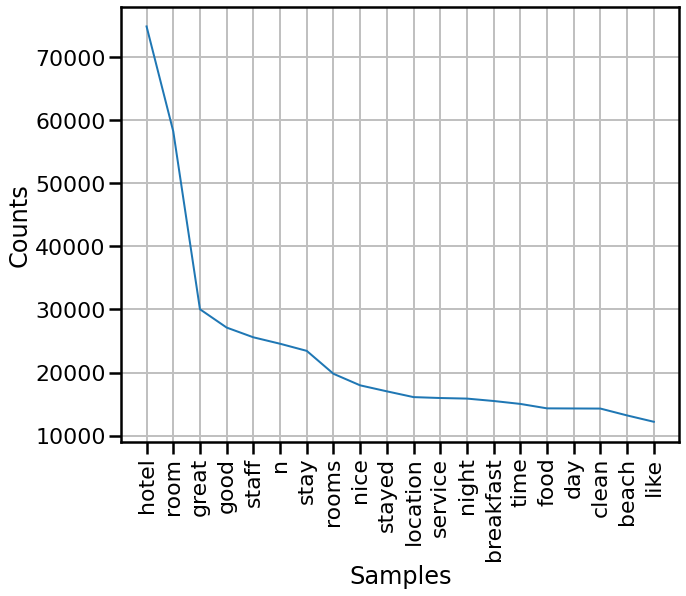

In [49]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(flat_list_review_summaries_no_stop).plot(20)
plt.show()

# 1.2 Removing Unmeaningful Words 1st Attempt

In [50]:
for word in ['hotel','stay','location','rooms','service','room','n']:
    stop_words.append(word)

In [51]:
flat_list_review_summaries_no_stop_2 =  [word for word in flat_list_review_summaries_no_stop if word not in stop_words]

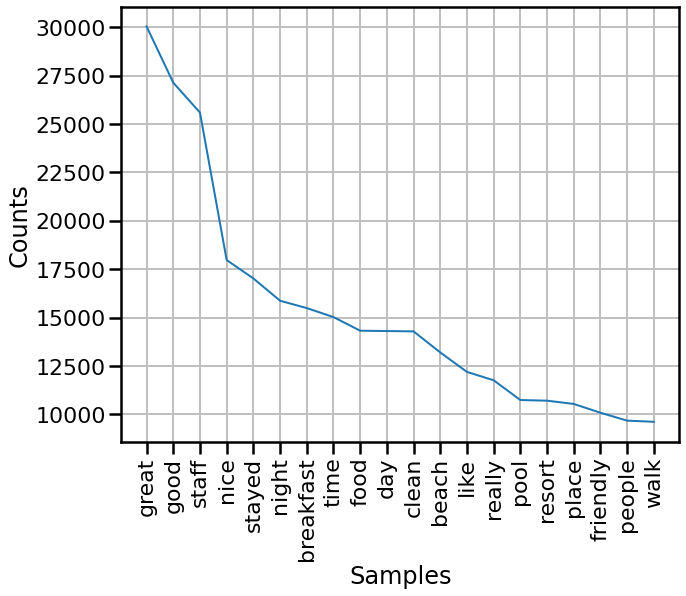

In [52]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_2).plot(20)
plt.show()

# 1.3 Removing Unmeaningful Words 2nd Attempt

In [53]:
for word in ['breakfast','pool','walk','day','beach']:
    stop_words.append(word)

In [54]:
flat_list_review_summaries_no_stop_3 =  [word for word in flat_list_review_summaries_no_stop_2 if word not in stop_words]

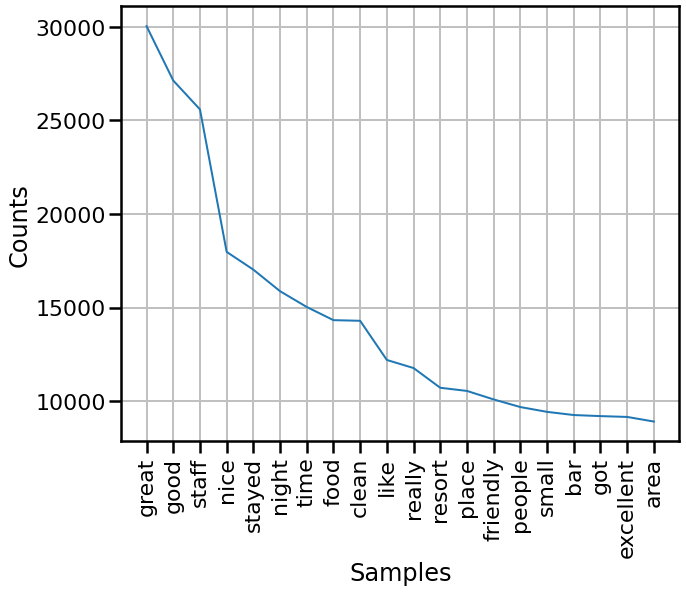

In [55]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_3).plot(20)
plt.show()

# 1.4 Removing Unmeaningful Words 3nd Attempt

In [56]:
for word in ['staff','night','time','food','place','resort','people','bar','got','bed']:
    stop_words.append(word)

In [57]:
flat_list_review_summaries_no_stop_4 =  [word for word in flat_list_review_summaries_no_stop_3 if word not in stop_words]

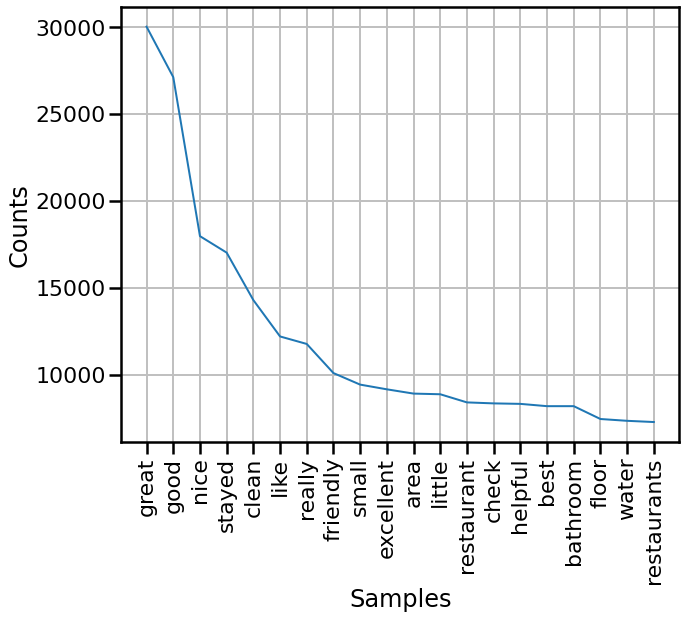

In [58]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_4).plot(20)
plt.show()

# 1.5 Removing Unmeaningful Words 4nd Attempt

In [59]:
for word in ['area','check','restaurant','bathroom','floor','water']:
    stop_words.append(word)

In [60]:
flat_list_review_summaries_no_stop_5 =  [word for word in flat_list_review_summaries_no_stop_4 if word not in stop_words]

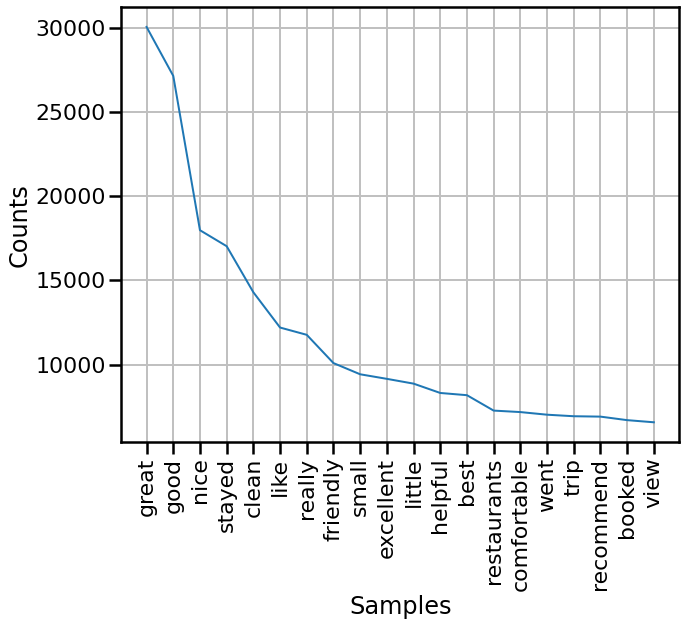

In [61]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_5).plot(20)
plt.show()

# 1.6 Removing Unmeaningful Words 5nd Attempt

In [62]:
for word in ['went','restaurants','booked','hilton','trip']:
    stop_words.append(word)

In [63]:
flat_list_review_summaries_no_stop_6 =  [word for word in flat_list_review_summaries_no_stop_5 if word not in stop_words]

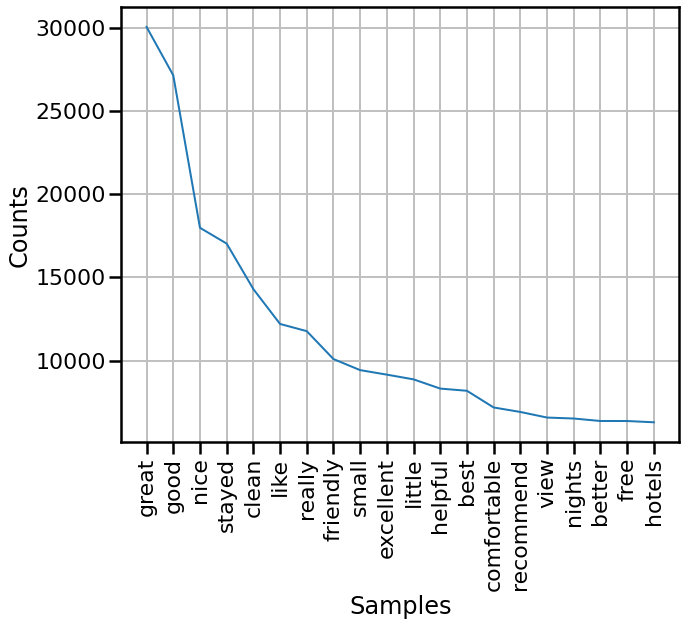

In [64]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_6).plot(20)
plt.show()

# 1.7 Removing Unmeaningful Words 6nd Attempt

In [65]:
for word in ['desk','nights','view','hotels']:
    stop_words.append(word)

In [66]:
flat_list_review_summaries_no_stop_7 =  [word for word in flat_list_review_summaries_no_stop_6 if word not in stop_words]

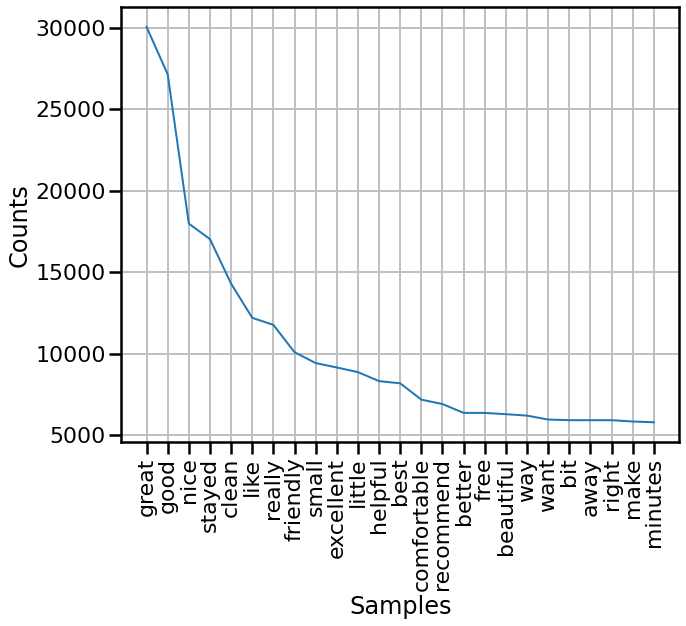

In [67]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_7).plot(25)
plt.show()

# 1.8 Removing Unmeaningful Words 7nd Attempt

In [68]:
for word in ['way','bit','want','airport','minutes']:
    stop_words.append(word)

In [69]:
flat_list_review_summaries_no_stop_8 =  [word for word in flat_list_review_summaries_no_stop_7 if word not in stop_words]

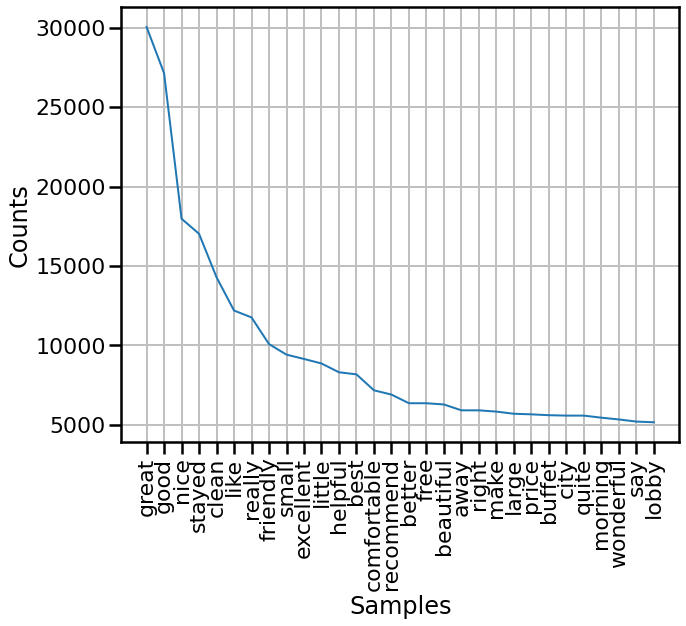

In [70]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_8).plot(30)
plt.show()

# 1.9 Removing Unmeaningful Words 8nd Attempt

In [71]:
for word in ['price','make','morning','city','buffet','say']:
    stop_words.append(word)

In [72]:
flat_list_review_summaries_no_stop_9 =  [word for word in flat_list_review_summaries_no_stop_8 if word not in stop_words]

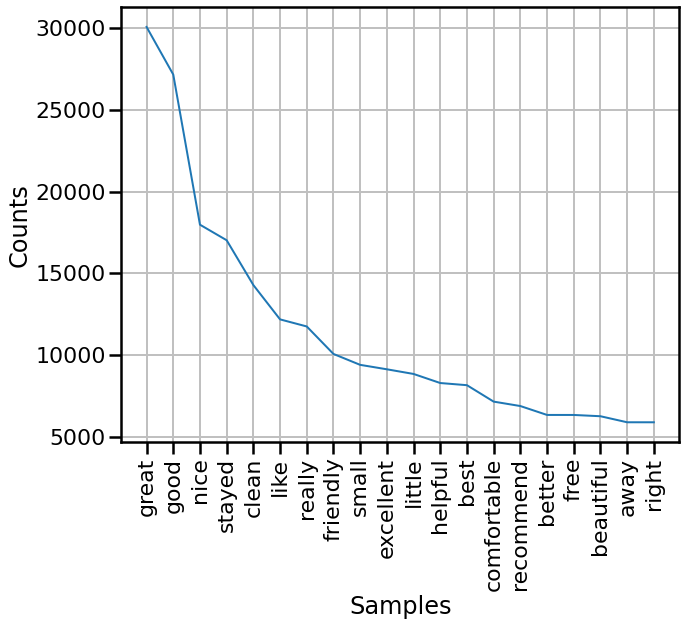

In [73]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_9).plot(20)
plt.show()

# Word Cloud for Review Summaries

In [74]:
flat_clean_sum_str = " ".join(flat_list_review_summaries_no_stop_9)

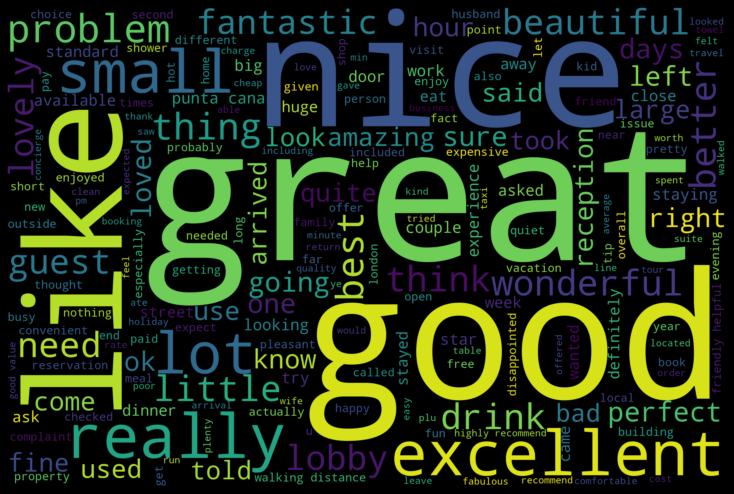

In [75]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_sum_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off') 
plt.tight_layout(pad=0)
plt.show()

# Stemming and Lemming

In [76]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [77]:
def apply_stem(doc):
    
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
        
    return stem_doc



def apply_lem(doc):
    
    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '
        
    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_doc

In [78]:
df.head()

,rating,review
0.0,1.0,Its hard to find words that can describe this ...
1.0,1.0,"Absolutely terrible. Cracked ceiling, tiny roo..."
2.0,1.0,Very disappointed firstly i checked in online ...
3.0,1.0,First of all we arrived wanting to park at the...
4.0,1.0,"Hello, I currently staying @ Hilton Metropole..."


In [79]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [80]:
df['review_stemmed'] = df['review'].apply(apply_stem)
df['review_lemmed'] = df['review'].apply(apply_lem)

In [81]:
df.head()

,rating,review,review_stemmed,review_lemmed
0.0,1.0,Its hard to find words that can describe this ...,it hard to find word that can describ thi expe...,Its hard to find word that can describe this e...
1.0,1.0,"Absolutely terrible. Cracked ceiling, tiny roo...","absolut terrible. crack ceiling, tini room, ba...","Absolutely terrible. Cracked ceiling, tiny roo..."
2.0,1.0,Very disappointed firstly i checked in online ...,veri disappoint firstli i check in onlin but h...,Very disappoint firstly i check in online but ...
3.0,1.0,First of all we arrived wanting to park at the...,first of all we arriv want to park at the hote...,First of all we arrive want to park at the hot...
4.0,1.0,"Hello, I currently staying @ Hilton Metropole...","hello, i current stay @ hilton metropol in lo...","Hello, I currently stay @ Hilton Metropole in..."


In [82]:
review_index_to_check = 1013
print("ORIGINAL REVIEW:",'\n',df['review'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW: 
 My wife booked this hotel for myself and a friend.  She told reservations to note who would be staying in the room. They did not.  I was not allowed into the room until my wife rang to confirm who would be staying in the room.  She was not contactable for hours so it was very inconvenient.  This was not our first time at this hotel but it is definitely the last. I asked reception to look at our other booking but she refused.  It was their error not putting the names on the booking.  Breakfast - cold and disgusting. On day two a nice lady did get a chef to cook something which was hot.     Dinner was included but we did not chance eating it.  Went elsewhere.   Next  

STEMMED REIVEW: 
 my wife book thi hotel for myself and a friend.  she told reserv to note who would be stay in the room. they did not.  i wa not allow into the room until my wife rang to confirm who would be stay in the room.  she wa not contact for hour so it wa veri inconvenient.  thi wa not our first

Stemmation had broken down some words into words that don't exist, whereas lemmitisation had simplified adjectives and verbs to their root form. I chose to continue with the lemmitised version of the texts for further processing.

# Train - Test Split

In [83]:
df.head()

,rating,review,review_stemmed,review_lemmed
0.0,1.0,Its hard to find words that can describe this ...,it hard to find word that can describ thi expe...,Its hard to find word that can describe this e...
1.0,1.0,"Absolutely terrible. Cracked ceiling, tiny roo...","absolut terrible. crack ceiling, tini room, ba...","Absolutely terrible. Cracked ceiling, tiny roo..."
2.0,1.0,Very disappointed firstly i checked in online ...,veri disappoint firstli i check in onlin but h...,Very disappoint firstly i check in online but ...
3.0,1.0,First of all we arrived wanting to park at the...,first of all we arriv want to park at the hote...,First of all we arrive want to park at the hot...
4.0,1.0,"Hello, I currently staying @ Hilton Metropole...","hello, i current stay @ hilton metropol in lo...","Hello, I currently stay @ Hilton Metropole in..."


In [84]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['rating']), 
                                                    df['rating'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [85]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28450, 3)
(7113, 3)
(28450,)
(7113,)


In [86]:
x_train.head()

,review,review_stemmed,review_lemmed
4850.0,Hotel is what it is. Clean and functional and ...,hotel is what it is. clean and function and fo...,Hotel be what it is. Clean and functional and ...
1086.0,Just checked in for a 4 day trip to London (Bu...,just check in for a 4 day trip to london (busi...,Just check in for a 4 day trip to London (Busi...
5864.0,We don’t usually report on major chain hotels ...,we don’t usual report on major chain hotel in ...,We don’t usually report on major chain hotels ...
19677.0,money grabbing charge credit card checkin chec...,"money grab charg credit card checkin checkout,...",money grab charge credit card checkin checkout...
3953.0,"OK hotel, but with the Hilton brand you would ...","ok hotel, but with the hilton brand you would ...","OK hotel, but with the Hilton brand you would ..."


In [87]:
x_test.head()

,review,review_stemmed,review_lemmed
7940.0,"fabulous, runaway housewifes need time, wind c...","fabulous, runaway housewif need time, wind chi...","fabulous, runaway housewifes need time, wind c..."
8134.0,This hotel is so convenient for the airport. ...,thi hotel is so conveni for the airport. ther...,This hotel be so convenient for the airport. ...
8903.0,What a great stay! Our check in was handled ma...,what a great stay! our check in wa handl marve...,What a great stay! Our check in be handle marv...
5512.0,"absouloutly stunning travelling group 4 girls,...","absouloutli stun travel group 4 girls, arriv a...","absouloutly stun travel group 4 girls, arrive ..."
4859.0,"impressive hotel completely met expectations, ...","impress hotel complet met expectations, 2 bloc...","impressive hotel completely meet expectations,..."


In [88]:
y_test.head()

7940.0    4.0
8134.0    5.0
8903.0    5.0
5512.0    5.0
4859.0    5.0
Name: rating, dtype: float64

In [89]:
y_train.head()

4850.0     3.0
1086.0     1.0
5864.0     4.0
19677.0    2.0
3953.0     3.0
Name: rating, dtype: float64

In [90]:
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_train_df.head()

,rating
0,3.0
1,1.0
2,4.0
3,2.0
4,3.0


# TF-IDF Vectorisation for Reviews

In [91]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,2),
                              min_df = 0.05)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['review_lemmed'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['review_lemmed'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,access,actually,air,amaze,arrival,arrive,ask,available,...,week,weekend,welcome,well,wife,wonderful,work,worth,would,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180012,0.0,0.0,...,0.201343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.186715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366491,0.0


# Saving Preprocessed Dataset as CSVs

In [92]:
x_lemm_train_tfidf.to_csv('/content/3.x_train_data.csv',index=False)

In [93]:
x_lemm_test_tfidf.to_csv('/content/4.x_test_data.csv',index=False)

In [94]:
y_train_df.to_csv('/content/3.y_train_data.csv',index=False)

In [95]:
y_test_df.to_csv('/content/4.y_test_data.csv',index=False)